# Czy to jest ten sam człowiek?

### Celem jest pokazanie łatwego sposobu rozpoznania, że na dwóch zdjęciach jest ten sam człowiek.

Do czego jest to nam potrzebne? To może mieć wiele zastosowań np. ktoś przychodzi do banku z paszportem i chcemy sprawdzić, czy to jest ten sam człowiek (co w dokumentach). Z bardziej nowoczesnych rozwiązań - [zamiast używania biletu w komunikacji miejskiej, możemy skanować twarze](https://bit.ly/3et18cV) i wykrywać osoby, które nie mają biletu.

Trochę z innej beczki - w sklepach możemy sprawdzać, czy ten człowiek już kiedyś tutaj był, na co patrzył, co kupił itd. Swoją drogą zbieranie danych prywatnych wymaga zgody. Jak myślisz, jeśli przechowujemy wektor opisujący twarz człowieka, czy to już są dane prywatne? :)

Do tego zadania będziemy wykorzystywać bibliotekę [dlib](https://bit.ly/3f2Zpu1), która jest napisana w C++ oraz wykorzystamy model ResNet. Biblioteka na prostych przykładach działa raczej bardzo dobrze, dlatego zróbmy bardziej skomplikowany test.

Swoją drogą zwróć uwagę, jak szybko działa rozwiązanie.

In [1]:
import dlib
from skimage import io
from scipy.spatial import distance

import matplotlib.pyplot as plt
%matplotlib inline

## Wczytujemy model

In [2]:
sp = dlib.shape_predictor('../input/shape_predictor_68_face_landmarks.dat')
facerec = dlib.face_recognition_model_v1('../input/dlib_face_recognition_resnet_model_v1.dat')
detector = dlib.get_frontal_face_detector()

## Przypadkowe zdjęcie
Znalazłem zdjęcie w sieci, które nie jest banalne - człowiek różni się "w życiu" od tego, co jest w paszporcie. Taka życiowa sprawa :).

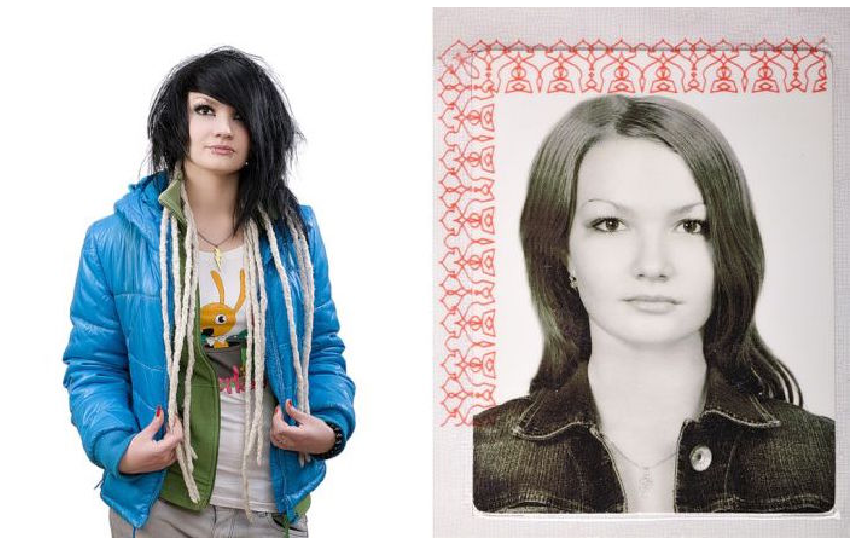

In [3]:
plt.figure(figsize=(12, 10))
plt.axis('off')
io.imshow('../input/faces/photo0.jpg');

## Zdjęcie z paszportu

Zaczynamy analizę od zdjęcia z paszportu.

In [4]:
img_passport = io.imread('../input/faces/photo0_passport.jpg')

###  Kod poniżej potrzebuje [X11](https://bit.ly/2QWLcXD)/GUI (serwer nie ma GUI, więc tylko lokalnie można to uruchomić).

Odpaliłem to lokalnie, żeby pokazać Ci przykładowy wynik (wykrywanie oczu, nosa, brwi itd.).

In [5]:
def calc_descriptor(img, win=None):
    if win:
        win.clear_overlay()
        win.set_image(img)
        
    dets = detector(img, 1)
    
    for k, d in enumerate(dets):
        print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
        shape = sp(img, d)
        
        if win:
            win.clear_overlay()
            win.add_overlay(d)
            win.add_overlay(shape)
            
    return facerec.compute_face_descriptor(img, shape)

![](../input/faces/descr_passport_0.png)

## Wektor
Wyliczamy wektor "twarzy" dla zdjęcia (w tym przypadku dla zdjęcia z paszportu).

In [6]:
img_passport = io.imread('../input/faces/photo0_passport.jpg')
face_descriptor_passport = calc_descriptor(img_passport)

Detection 0: Left: 110 Top: 153 Right: 239 Bottom: 282


## Zdjęcie "z życia"
Teraz analizujemy podobnie zdjęcie "z życia".

In [7]:
img_life = io.imread('../input/faces/photo0_life.jpg')
face_descriptor_life = calc_descriptor(img_life)

Detection 0: Left: 142 Top: 66 Right: 204 Bottom: 129


![](../input/faces/descr_life_0.png)

## Porównujemy dwa zdjęcia

Zaleca się wynik traktować w ten sposób - jeśli jest mniejszy niż 0.6, to wtedy to jest ten sam człowiek.

Czemu 0.6? Ponieważ taki threshold sprawdził się w praktyce. Kawałek z dokumentacji: 
```
When using a distance threshold of 0.6, the dlib model obtains an accuracy of 99.38% on the standard LFW face recognition benchmark, which is comparable to other state-of-the-art methods for face recognition as of February 2017.
```

Więcej jest [tutaj](https://bit.ly/3baoty0).

In [8]:
distance.euclidean(face_descriptor_passport, face_descriptor_life)

0.5183604355445943

No to jedziemy teraz na większych obrotach :).

## Przykład #1

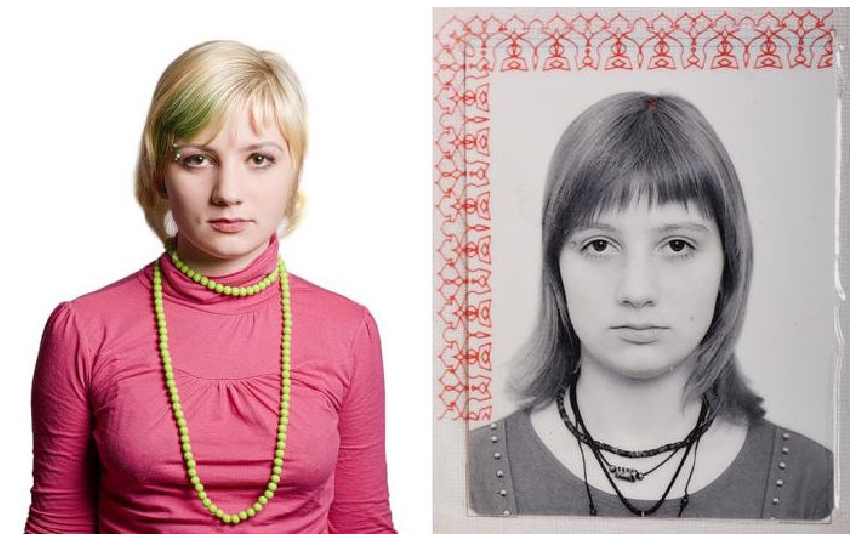

In [9]:
plt.figure(figsize=(12, 10))
plt.axis('off')
io.imshow('../input/faces/photo1.jpg');

In [10]:
# win = dlib.image_window()
face_descriptor_passport = calc_descriptor(io.imread('../input/faces/photo1_passport.jpg'))
face_descriptor_life = calc_descriptor(io.imread('../input/faces/photo1_life.jpg'))

distance.euclidean(face_descriptor_passport, face_descriptor_life)

Detection 0: Left: 98 Top: 150 Right: 253 Bottom: 305
Detection 0: Left: 127 Top: 92 Right: 235 Bottom: 199


0.4736212723608399

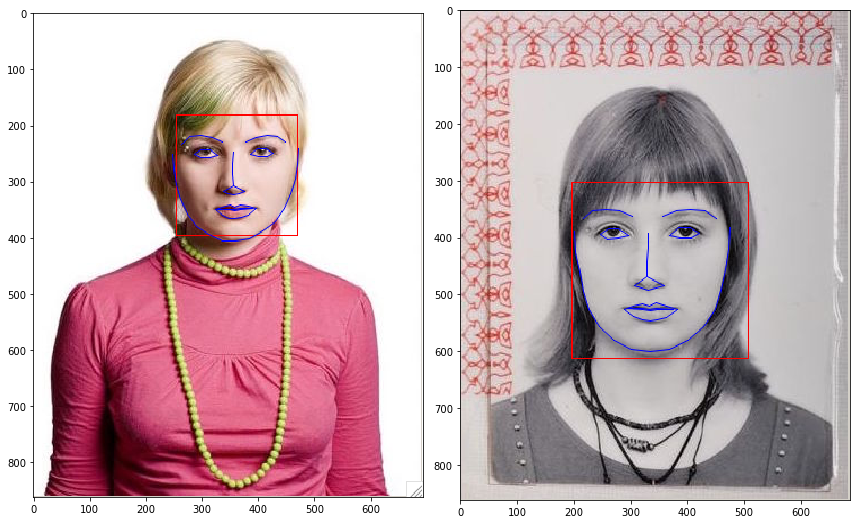

In [11]:
plt.figure(figsize=(12, 10))

plt.subplot(121)
io.imshow('../input/faces/desc_life_0.png')

plt.subplot(122)
io.imshow('../input/faces/desc_passport_0.png');

## Przykład #2

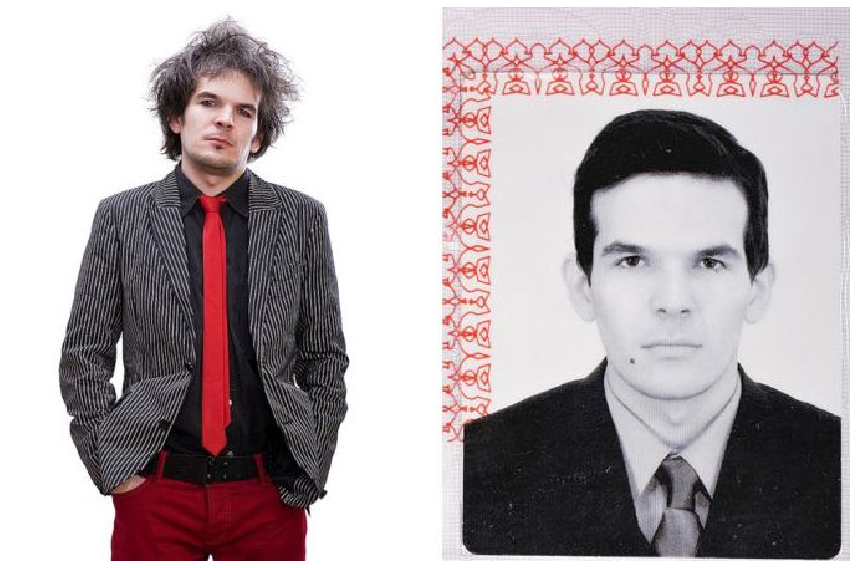

In [12]:
plt.figure(figsize=(12, 10))
plt.axis('off')
io.imshow('../input/faces/photo2.jpg');

In [13]:
face_descriptor_passport = calc_descriptor(io.imread('../input/faces/photo2_passport.jpg'))
face_descriptor_life = calc_descriptor(io.imread('../input/faces/photo2_life.jpg'))

distance.euclidean(face_descriptor_passport, face_descriptor_life)

Detection 0: Left: 124 Top: 168 Right: 253 Bottom: 297
Detection 0: Left: 142 Top: 59 Right: 204 Bottom: 122


0.396247017983107

## Przykład #3

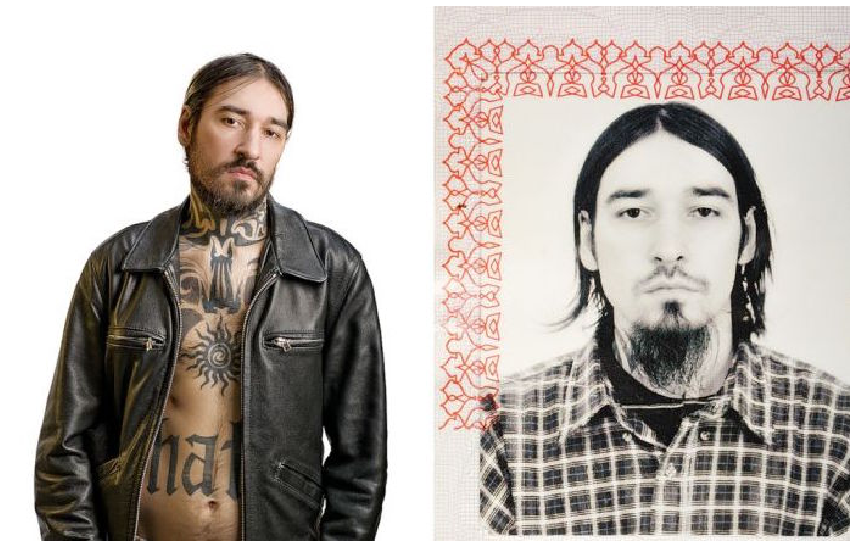

In [14]:
plt.figure(figsize=(12, 10))
plt.axis('off')
io.imshow('../input/faces/photo3.jpg');

In [15]:
face_descriptor_passport = calc_descriptor(io.imread('../input/faces/photo3_passport.jpg'))
face_descriptor_life = calc_descriptor(io.imread('../input/faces/photo3_life.jpg'))

distance.euclidean(face_descriptor_passport, face_descriptor_life)

Detection 0: Left: 124 Top: 139 Right: 253 Bottom: 268
Detection 0: Left: 145 Top: 66 Right: 235 Bottom: 156


0.4541325648183926

## Przykład #4

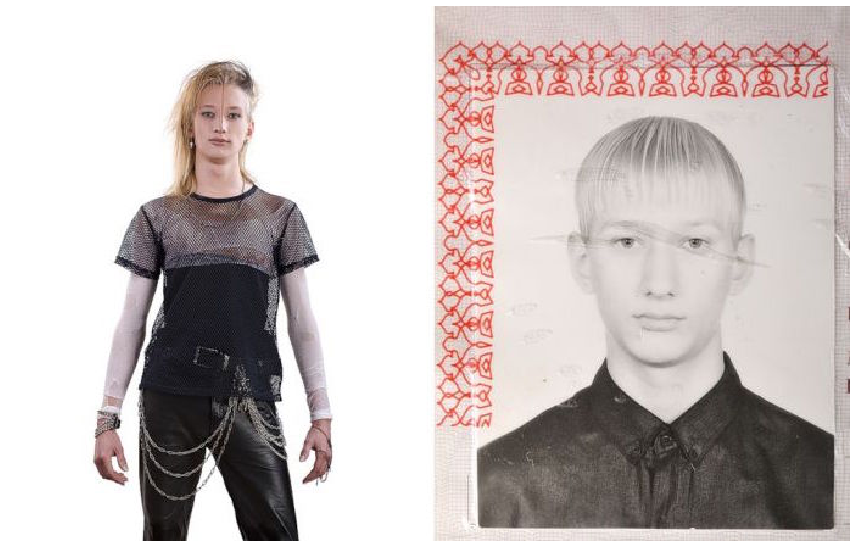

In [16]:
plt.figure(figsize=(12, 10))
plt.axis('off')
io.imshow('../input/faces/photo4.jpg');

In [17]:
face_descriptor_passport = calc_descriptor(io.imread('../input/faces/photo4_passport.jpg'))
face_descriptor_life = calc_descriptor(io.imread('../input/faces/photo4_life.jpg'))

distance.euclidean(face_descriptor_passport, face_descriptor_life)

Detection 0: Left: 124 Top: 153 Right: 253 Bottom: 282
Detection 0: Left: 146 Top: 74 Right: 189 Bottom: 118


0.590949425773911

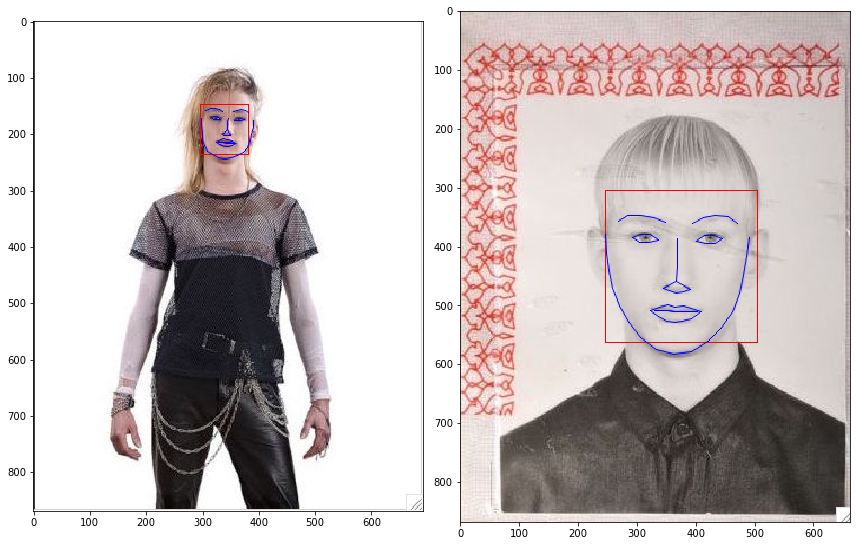

In [18]:
plt.figure(figsize=(12, 10))

plt.subplot(121)
io.imshow('../input/faces/desc_life_4.png')

plt.subplot(122)
io.imshow('../input/faces/desc_passport_4.png');

## Przykład #5

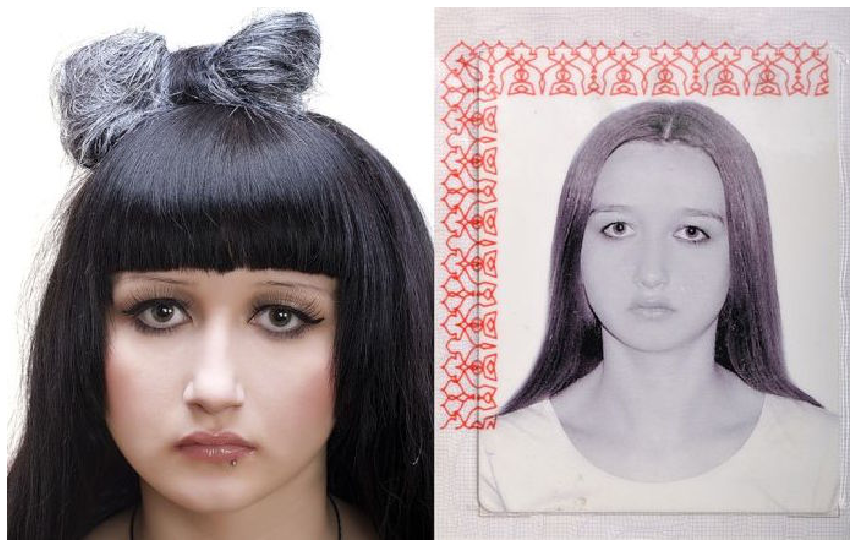

In [19]:
plt.figure(figsize=(12, 10))
plt.axis('off')
io.imshow('../input/faces/photo5.jpg');

In [20]:
face_descriptor_passport = calc_descriptor(io.imread('../input/faces/photo5_passport.jpg'))
face_descriptor_life = calc_descriptor(io.imread('../input/faces/photo5_life.jpg'))

distance.euclidean(face_descriptor_passport, face_descriptor_life)

Detection 0: Left: 110 Top: 153 Right: 239 Bottom: 282
Detection 0: Left: 68 Top: 192 Right: 291 Bottom: 415


0.37972792167415925

## Przykład #6

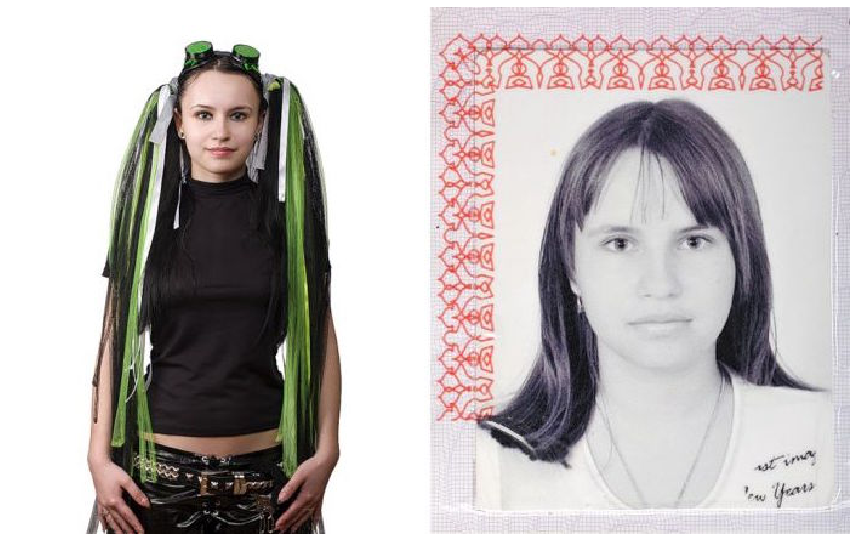

In [21]:
plt.figure(figsize=(12, 10))
plt.axis('off')
io.imshow('../input/faces/photo6.jpg');

In [22]:
face_descriptor_passport = calc_descriptor(io.imread('../input/faces/photo6_passport.jpg'))
face_descriptor_life = calc_descriptor(io.imread('../input/faces/photo6_life.jpg'))

distance.euclidean(face_descriptor_passport, face_descriptor_life)

Detection 0: Left: 98 Top: 150 Right: 253 Bottom: 305
Detection 0: Left: 129 Top: 63 Right: 204 Bottom: 138


0.6198169796369649

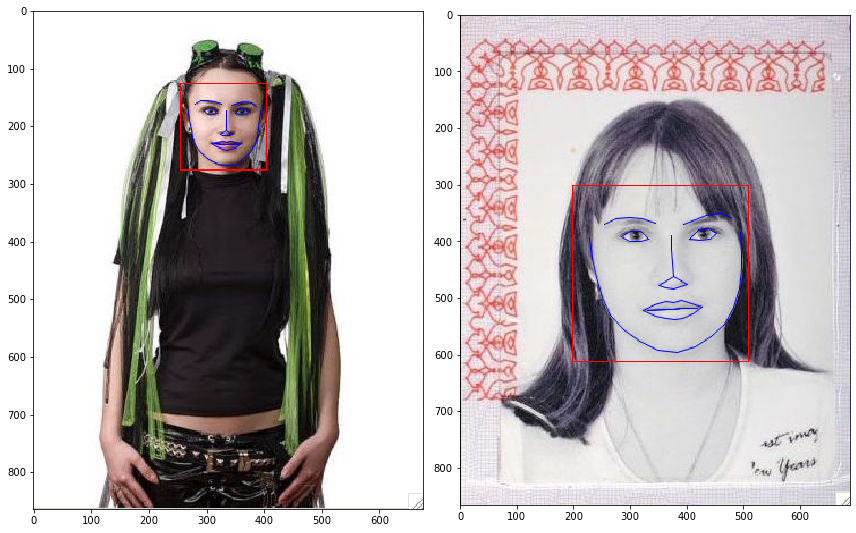

In [23]:
plt.figure(figsize=(12, 10))

plt.subplot(121)
io.imshow('../input/faces/desc_life_6.png')

plt.subplot(122)
io.imshow('../input/faces/desc_passport_6.png');

Ooops jednak nie załapała się. Jak myślisz dlaczego?

## Przykład #7

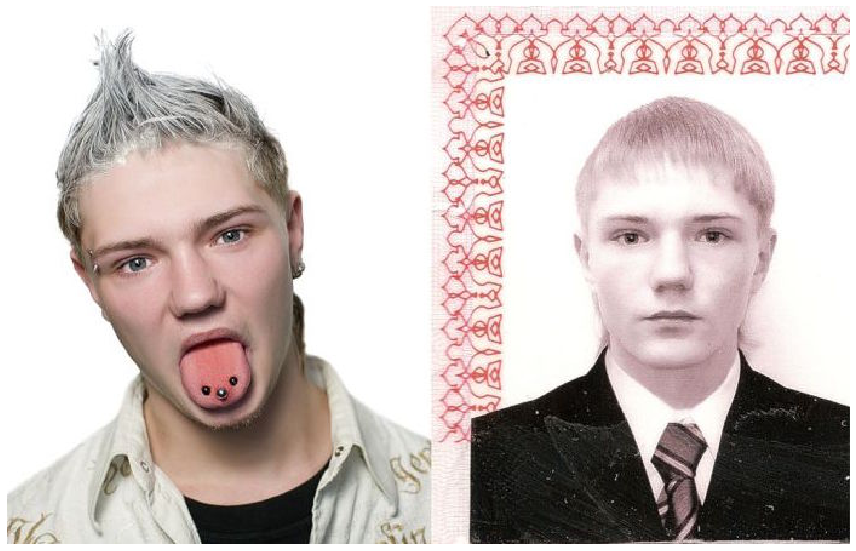

In [24]:
plt.figure(figsize=(12, 10))
plt.axis('off')
io.imshow('../input/faces/photo7.jpg');

In [25]:
face_descriptor_passport = calc_descriptor(io.imread('../input/faces/photo7_passport.jpg'))
face_descriptor_life = calc_descriptor(io.imread('../input/faces/photo7_life.jpg'))

distance.euclidean(face_descriptor_passport, face_descriptor_life)

Detection 0: Left: 115 Top: 150 Right: 270 Bottom: 305
Detection 0: Left: 56 Top: 139 Right: 242 Bottom: 325


0.4493441405359391

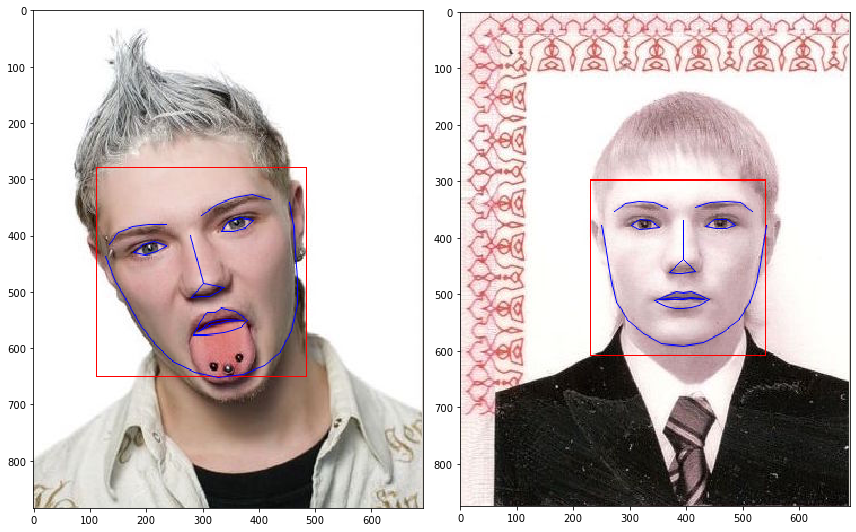

In [26]:
plt.figure(figsize=(12, 10))

plt.subplot(121)
io.imshow('../input/faces/desc_life_7.png')

plt.subplot(122)
io.imshow('../input/faces/desc_passport_7.png');

## Przykład #8

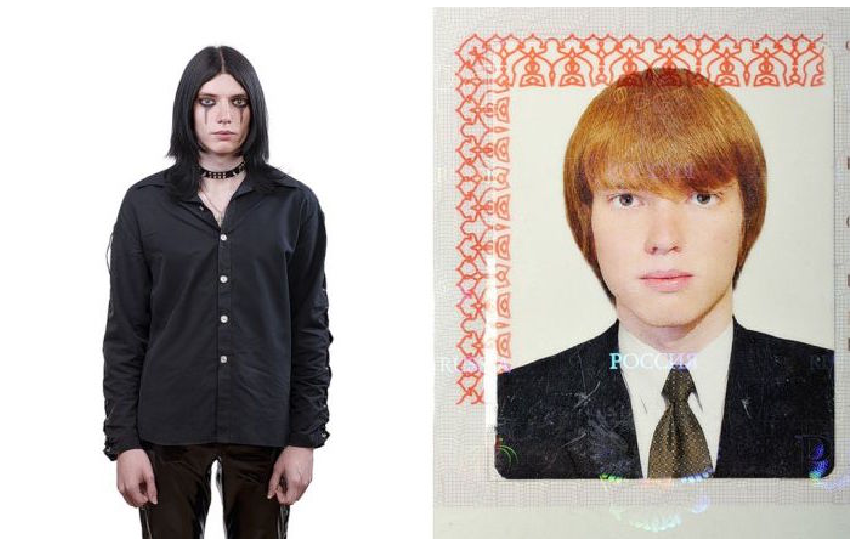

In [27]:
plt.figure(figsize=(12, 10))
plt.axis('off')
io.imshow('../input/faces/photo8.jpg');

In [28]:
#win = dlib.image_window()

face_descriptor_passport = calc_descriptor(io.imread('../input/faces/photo8_passport.jpg'))
face_descriptor_life = calc_descriptor(io.imread('../input/faces/photo8_life.jpg'))

distance.euclidean(face_descriptor_passport, face_descriptor_life)

Detection 0: Left: 124 Top: 125 Right: 253 Bottom: 254
Detection 0: Left: 147 Top: 61 Right: 199 Bottom: 113


0.6603927018750891

Uhh... ależ poszalał chłopak, nawet model go nie rozpoznał :D.

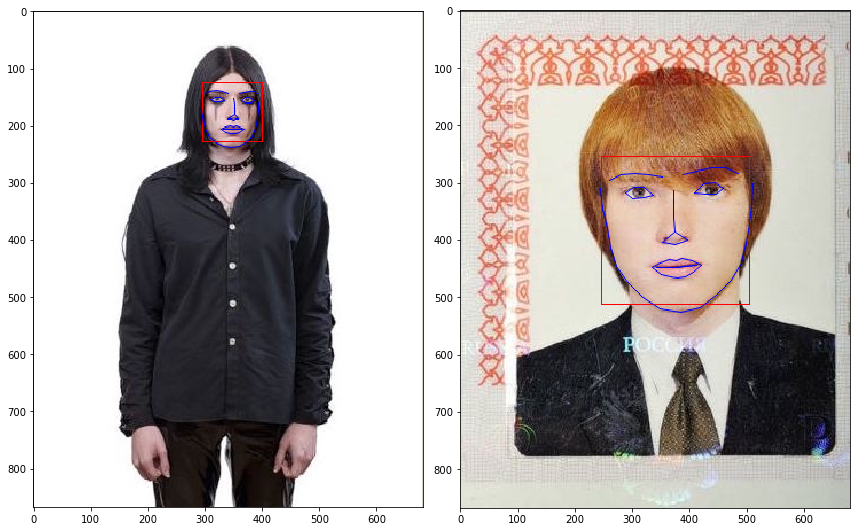

In [29]:
plt.figure(figsize=(12, 10))

plt.subplot(121)
io.imshow('../input/faces/desc_life_8.png')

plt.subplot(122)
io.imshow('../input/faces/desc_passport_8.png');

## Przykład #9

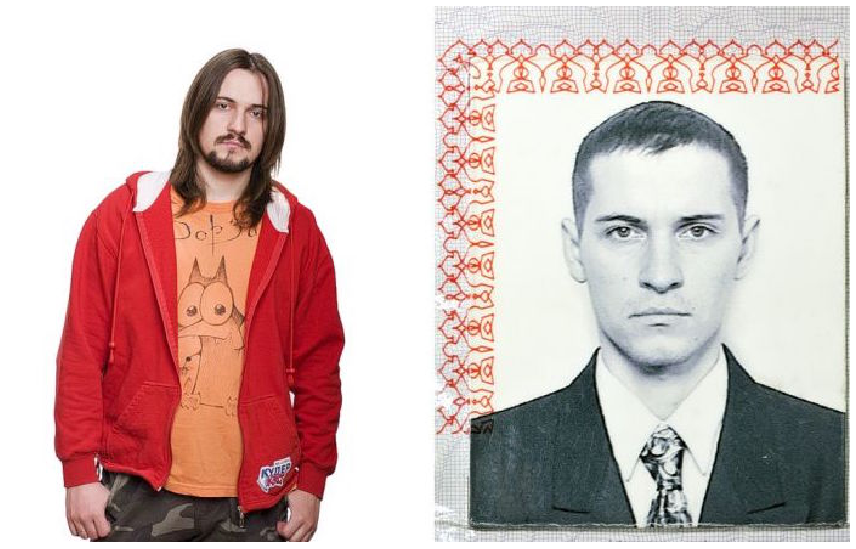

In [30]:
plt.figure(figsize=(12, 10))
plt.axis('off')
io.imshow('../input/faces/photo9.jpg');

In [31]:
face_descriptor_passport = calc_descriptor(io.imread('../input/faces/photo9_passport.jpg'))
face_descriptor_life = calc_descriptor(io.imread('../input/faces/photo9_life.jpg'))

distance.euclidean(face_descriptor_passport, face_descriptor_life)

Detection 0: Left: 124 Top: 153 Right: 253 Bottom: 282
Detection 0: Left: 156 Top: 66 Right: 218 Bottom: 129


0.5469053726633953

## Przykład #10

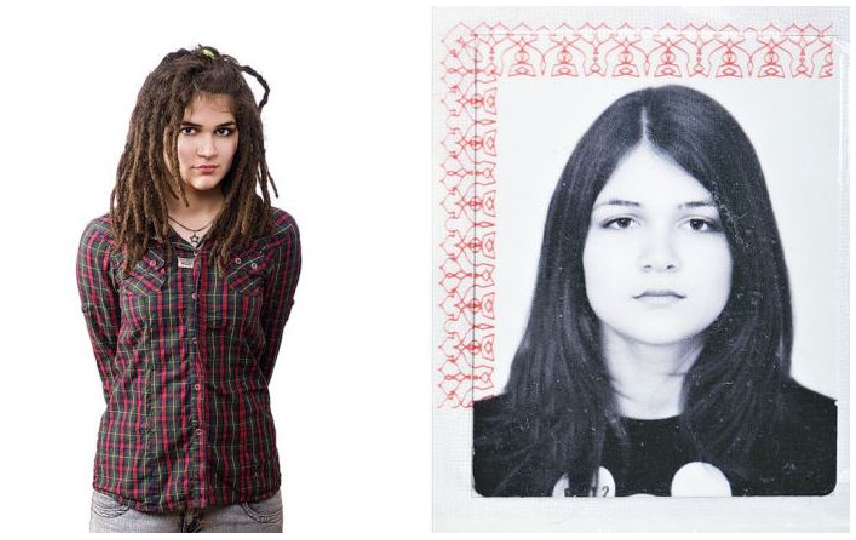

In [32]:
plt.figure(figsize=(12, 10))
plt.axis('off')
io.imshow('../input/faces/photo10.jpg');

In [33]:
face_descriptor_passport = calc_descriptor(io.imread('../input/faces/photo10_passport.jpg'))
face_descriptor_life = calc_descriptor(io.imread('../input/faces/photo10_life.jpg'))

distance.euclidean(face_descriptor_passport, face_descriptor_life)

Detection 0: Left: 124 Top: 139 Right: 253 Bottom: 268
Detection 0: Left: 128 Top: 87 Right: 190 Bottom: 149


0.5043536740210806